## Import libraries

In [1]:
import numpy as np
import pandas as pd
from welly import Project, Well
import matplotlib.pyplot as plt

## Get a list of well logs available in working directory

In [2]:
ls *.LAS

 Volume in drive C is OS
 Volume Serial Number is 7041-7A2E

 Directory of C:\Users\Ankit Bansal\Desktop\Volve_log

10-09-2020  18:23         8,687,815 15_9-F-11A.LAS
10-09-2020  18:23        10,129,805 15_9-F-11B.LAS
10-09-2020  18:23        11,354,957 15_9-F-1A.LAS
10-09-2020  18:23        12,251,857 15_9-F-1B.LAS
10-09-2020  18:23        13,309,432 15_9-F-1C.LAS
               5 File(s)     55,733,866 bytes
               0 Dir(s)  77,406,220,288 bytes free


## Create a Project

> Import all the LAS files to create Project object. The output lists the time taken to import a lot and also the well names of the logs. 

In [3]:
p = Project.from_las('./*.las')
print(p)

0it [00:00, ?it/s]C:\ProgramData\Anaconda3\lib\site-packages\welly\well.py:173: FutureWarning: From v0.5 the default will be 'original', keeping whatever is used in the LAS file. If you want to force conversion to metres, change your code to use `index='m'`.
  warnings.warn(m, FutureWarning)
5it [00:10,  2.16s/it]

11A
11B
1A
1B
1C


#### Export data to a Pandas dataframe for scientific computing workflows

> Pandas can provide a seamless integration into existing workflows and databases. However, the Welly library provides an intitutive way of working with well and logs rather instead of dataframes.

>The output displays the well logs of well 11A from 2500m to 3000m stored in the Pandas dataframe.

In [4]:
df_wells = p.df()
df_wells.loc['11A'].query('Depth > 2500 & Depth < 3000')

,ABDCQF01,ABDCQF02,ABDCQF03,ABDCQF04,BS,CALI,DRHO,DT,DTS,GR,...,RACEHM,RACELM,RD,RHOB,RM,ROP,RPCEHM,RPCELM,RT,NBGRCFM
Depth,,,,,,,,,,,,,,,,,,,,,
2500.1,2.196,2.090,1.741,1.804,17.5,NaN,NaN,NaN,NaN,83.849,...,NaN,NaN,0.753,NaN,0.784,22.616,NaN,NaN,0.784,NaN
2500.2,2.196,2.090,1.741,1.804,17.5,NaN,NaN,NaN,NaN,84.439,...,NaN,NaN,0.767,NaN,0.806,22.906,NaN,NaN,0.806,NaN
2500.3,2.196,2.090,1.741,1.804,17.5,NaN,NaN,NaN,NaN,78.017,...,NaN,NaN,0.774,NaN,0.797,23.374,NaN,NaN,0.797,NaN
2500.4,2.196,2.090,1.741,1.804,17.5,NaN,NaN,NaN,NaN,81.418,...,NaN,NaN,0.763,NaN,0.777,23.841,NaN,NaN,0.777,NaN
2500.5,2.196,2.090,1.741,1.804,17.5,NaN,NaN,NaN,NaN,82.551,...,NaN,NaN,0.768,NaN,0.772,24.308,NaN,NaN,0.772,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999.6,2.525,2.526,2.533,2.516,8.5,8.625,0.052,69.980,126.601,10.354,...,2.270,2.415,2.431,2.523,2.713,23.931,2.713,2.431,2.713,NaN
2999.7,2.532,2.534,2.532,2.512,8.5,8.625,0.052,69.866,127.966,10.525,...,2.268,2.405,2.435,2.525,2.743,23.939,2.744,2.435,2.743,NaN
2999.8,2.535,2.545,2.532,2.508,8.5,8.625,0.053,69.788,130.628,10.690,...,2.285,2.405,2.449,2.528,2.778,23.926,2.778,2.449,2.778,NaN


## Create a Well object from the project

> A well object 'well_11A' is created from the Project. The output prints the header of the LAS file.

In [5]:
well_11A = p.get_well('11A')
well_11A

Well(uwi: '11A', 21 curves: ['ABDCQF01', 'ABDCQF02', 'ABDCQF03', 'ABDCQF04', 'BS', 'CALI', 'DRHO', 'DT', 'DTS', 'GR', 'NPHI', 'PEF', 'RACEHM', 'RACELM', 'RD', 'RHOB', 'RM', 'ROP', 'RPCEHM', 'RPCELM', 'RT'])

## Plotting

### Plot Gamma ray and NPHI-RHOB well logs

> The object segment stores a section of the well log. The section is defined by a basis which can either be the Depth or Time data
>The depth of the Hugin formation in the 11A well is 3600m to 3700m. Gamma ray, Neutron Porosity, Density and Deep resistivity logs are segmented for analysis. 
>The Output displays the Gamma ray log and also indicates the overlay of the Density and Neutron Porosity logs. The wells here are made using the Plotly library but other pltting libraries can easily be integrated

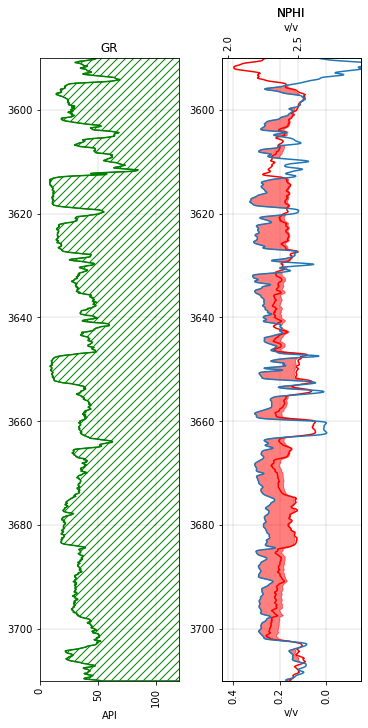

In [6]:
segment_GR = well_11A.data['GR'].to_basis(start=3590, stop=3710)
segment_NPHI = well_11A.data['NPHI'].to_basis(start=3590, stop=3710)
segment_RHOB = well_11A.data['RHOB'].to_basis(start=3590, stop=3710)
segment_RT = well_11A.data['RPCEHM'].to_basis(start=3590, stop=3710)

#Matplotlib plotly functions can be used with Welly objects
fig, axes = plt.subplots(nrows =1,ncols = 2,constrained_layout=True, figsize =(5, 10))

segment_GR.plot(ax = axes[0], c = 'g')
axes[0].set_xlim([0, 120])
axes[0].fill_betweenx(segment_GR.basis, 150,  segment_GR, hatch='///', edgecolor='green', facecolor='none')

ax1 = axes[1]
ax2 = ax1.twiny()
ax1.set_xlim([0.45, -0.15])
ax2.set_xlim([1.95, 2.95])
segment_NPHI.plot(ax=ax1, c = 'r')
segment_RHOB.plot(ax=ax2)
segment_2 = -segment_NPHI+2.6
segment_2.plot(ax=ax2, c = 'None')
ax2.fill_betweenx(segment_NPHI.basis, segment_RHOB, segment_2, color='red', alpha=0.5, where = (segment_2>segment_RHOB))

### Plot all the Gamma Ray logs in a project

> An important part of geologic interpretation is correlating logs from different wells. Here, the Gamma ray logs of all wells in the Project are plotted.
>Despiking was performed in the well log of well 1C. A Median window based filter is available as a part of the Welly library is used. 

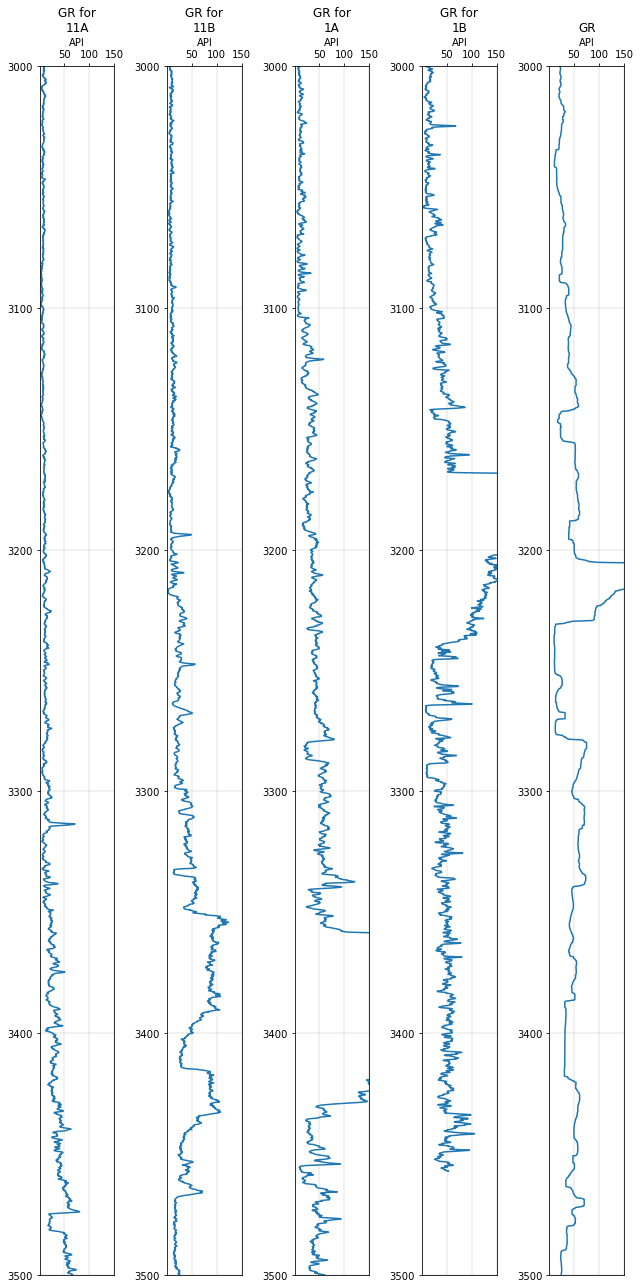

In [7]:
fig, axs = plt.subplots(figsize=(9, 18), ncols=len(p)) 

for i, (ax, w) in enumerate(zip(axs, p)):
    gr = w.data['GR']
    if gr is not None:
        ax = gr.plot(ax=ax)
    ax.set_title("GR for\n{}".format(w.uwi))

#Show despiking operation
axs[4].clear()
g = p.get_well('1C').data['GR'].smooth(window_length=50, samples=True, func1d=np.median)
g.plot(ax=axs[4])

for ax in axs:
    ax.set_xlim([1, 150])
    ax.set_ylim([3000, 3500])
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
fig.tight_layout()

## Post processing of well logs

> Calculate the porosity, water saturation, permeability from the equations provided in the Petrophysical Interpretation report. Log segments have been used to calculate these properties.

In [8]:
#Calculate parameters for cross plot
#Calculate PHIF for well 11A
PHID = (2.65-segment_RHOB)/(2.65-0.9)
PHIF = PHID + 0.4*(segment_NPHI-PHID)+0.01

#Calculate Vsh for well 11A
VSH = (segment_GR-7)/(120-7)

#Calulate KLOGH
KLOGH = 10**(2+(8*PHIF)-(9*VSH))
#(2+8*PHIF−9*VSH)

#Calculate Swt fro well 11A
m = 1.865*(KLOGH**-0.0083)
SWt = 0.07/ ((PHIF**m)*segment_RT)

> An industry standard cross plot of the Porosity vs Permeability is plotted. The output indicates that most of sand has a permeblity of around 100 mD. Sand sections with a permeability above 1000 mD indicate the presence of a thief zone.

Text(0, 0.5, 'KLOGH (mD)')

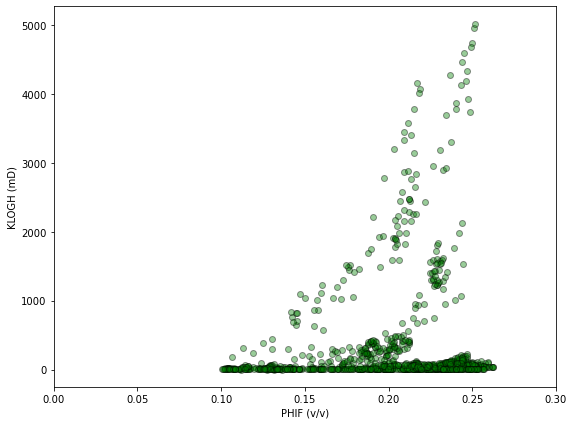

In [9]:
#Make cross plot of PHIF and KLOGH
fig, axs = plt.subplots(figsize=(9, 7)) 
axs.scatter(PHIF[(PHIF>0.1) & (VSH<0.5)],KLOGH[(PHIF>0.1) & (VSH<0.5)], color = 'g', Edgecolor = 'k', alpha = 0.4)
axs.set_xlim([0,0.3])
axs.set_xlabel('PHIF (v/v)')
axs.set_ylabel('KLOGH (mD)')

## Export the calculted paraemter as a LAS file

> The calculate properties from the well log are exported as a LAS file.

In [10]:
well_11A.data['KLOGH']=KLOGH
well_11A.data['PHIF']=PHIF
well_11A.data['VSH']=VSH
well_11A.to_las(fname='11A_output.LAS',keys = ['KLOGH', 'PHIF', 'VSH'])